In [1]:
import dotenv
import os
from sqlalchemy import create_engine
import pandas as pd
dotenv.load_dotenv()
username=os.getenv("usernames")
password=os.getenv("password")
host=os.getenv("host")
dbname=os.getenv("dbname")
dbname='Titanic'
conn_string = f"mysql+pymysql://{username}:{password}@{host}/{dbname}"
db_engine = create_engine(conn_string)
query = """ SELECT * FROM titanic
"""
df = pd.read_sql(query, db_engine)
db_engine.dispose()
df.shape
df

,PassengerId,PClass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,EmbarkDate
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,,S,0,10-4-1912
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.28,C85,C,1,11-4-1912
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.93,,S,1,10-4-1912
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.10,C123,S,1,10-4-1912
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.05,,S,0,10-4-1912
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.05,,S,0,10-4-1912
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.90,C105,C,1,11-4-1912
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.25,,S,0,10-4-1912
1307,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.05,,S,0,10-4-1912


In [7]:
# per sapere gli elenti unici contenuti nella colonna Parch
df.Cabin.unique()

array(['', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       

In [26]:
df['ship_deck'] = df['Cabin'].str.slice(0,1)
df['ship_deck'] 

0        
1       C
2        
3       C
4        
       ..
1304     
1305    C
1306     
1307     
1308     
Name: ship_deck, Length: 1309, dtype: object

In [27]:
df['ship_deck'].unique()

array(['', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [28]:
df['ship_deck'].nunique()

9

<Axes: xlabel='PClass', ylabel='count'>

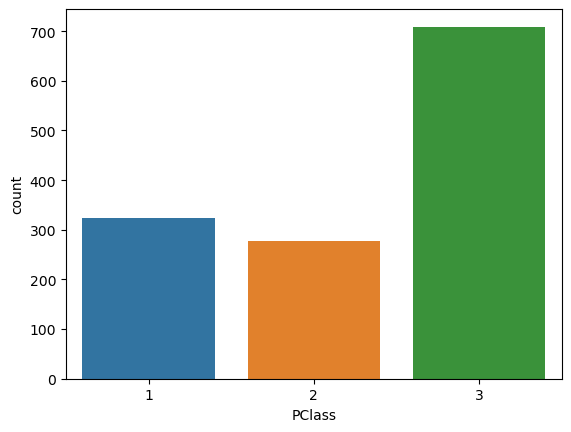

In [29]:
import seaborn as sns
sns.countplot(data=df, x='PClass')

<Axes: xlabel='Survived', ylabel='count'>

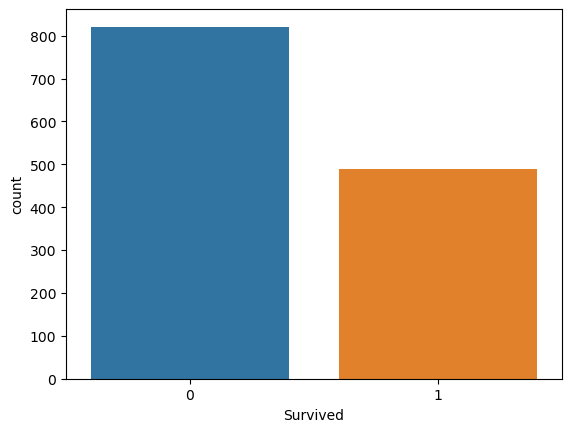

In [30]:
sns.countplot(data=df, x='Survived')

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

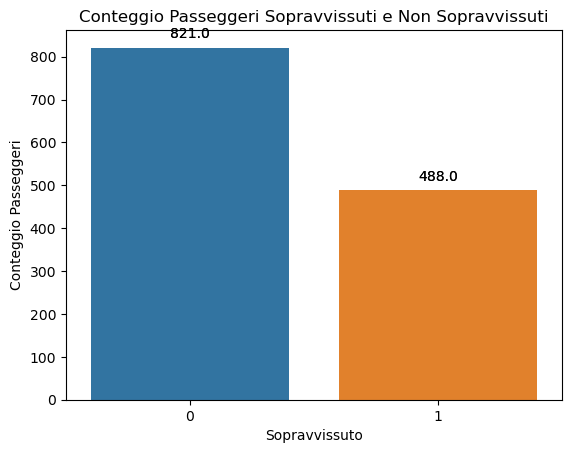

In [40]:
plt.title('Numero di Passeggeri per Classe di Imbarco')
plt.xlabel('Classe di Imbarco')
plt.ylabel('Conteggio Passeggeri')

ax = sns.countplot(x='Survived', data=df)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.title('Conteggio Passeggeri Sopravvissuti e Non Sopravvissuti')
plt.xlabel('Sopravvissuto')
plt.ylabel('Conteggio Passeggeri')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')


plt.show()

<Axes: ylabel='Frequency'>

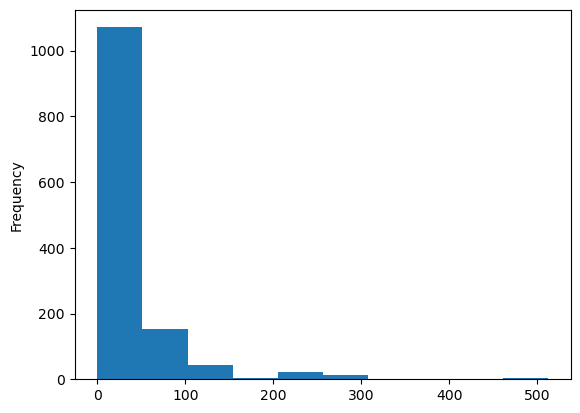

In [45]:
df.Fare.plot(kind = 'hist')

C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Fare', ylabel='Count'>

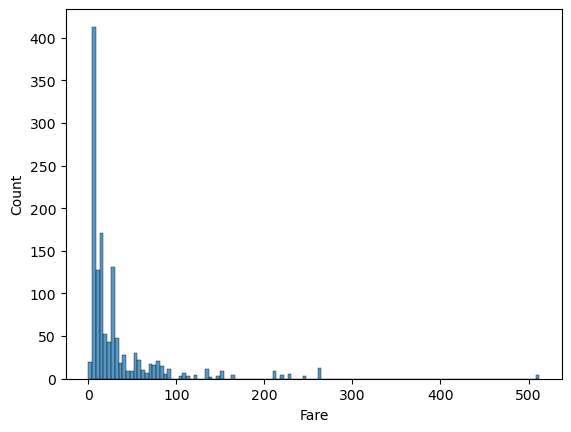

In [46]:
sns.histplot(data=df, x ='Fare')

<Axes: xlabel='PClass', ylabel='Age'>

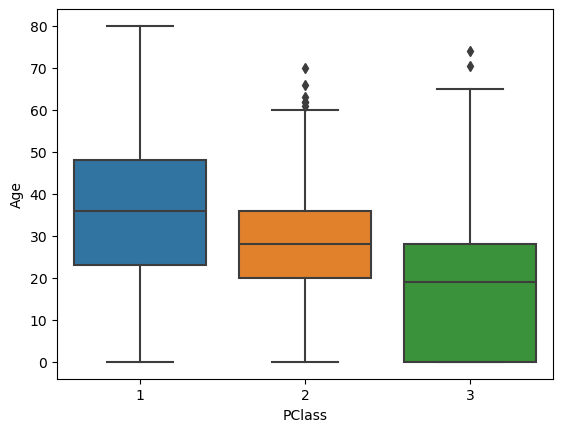

In [47]:
sns.boxplot(data=df, x='PClass', y= 'Age')

<Axes: xlabel='PClass', ylabel='Age'>

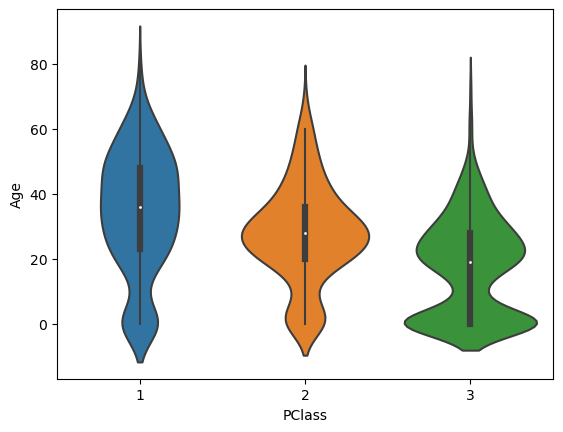

In [49]:
sns.violinplot(data=df, x='PClass', y= 'Age')

<Axes: xlabel='Survived', ylabel='Fare'>

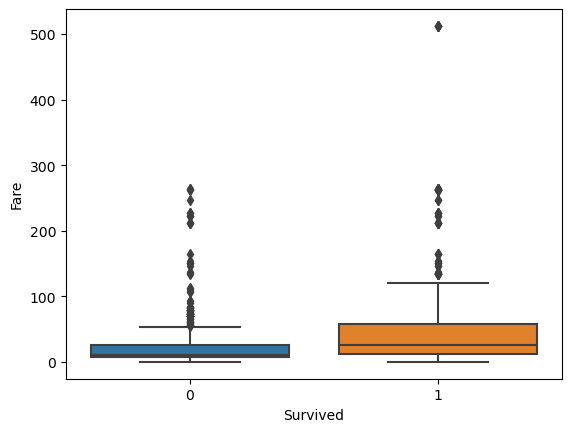

In [51]:
sns.boxplot(data=df, x='Survived', y= 'Fare')

In [53]:
price_corr = df.loc[:,["Fare", "PClass"]]
price_corr.corr()

,Fare,PClass
Fare,1.000000,-0.558795
PClass,-0.558795,1.000000


In [65]:
stock = pd.read_csv('../Dataset/beginner datasets 1/stockdata.csv')

In [66]:
stock

,MSFT,IBM,SBUX,AAPL,GSPC,Date
0,23.950705,80.517962,16.149666,11.086612,1416.599976,2007-01-03
1,23.910599,81.378851,16.167992,11.332687,1418.339966,2007-01-04
2,23.774242,80.642129,16.099269,11.251984,1409.709961,2007-01-05
3,24.006852,81.867244,16.039710,11.307550,1412.839966,2007-01-08
4,24.030914,82.835742,15.970989,12.246870,1412.109985,2007-01-09
...,...,...,...,...,...,...
2301,51.360001,132.800003,58.110001,96.099998,1929.800049,2016-02-24
2302,52.099998,134.500000,58.750000,96.760002,1951.699951,2016-02-25
2303,51.299999,132.029999,58.340000,96.910004,1948.050049,2016-02-26
2304,50.880001,131.029999,58.209999,96.690002,1932.229980,2016-02-29


In [70]:
stock['Date'] = pd.to_datetime(stock["Date"], format = "%Y-%m-%d")

<Axes: >

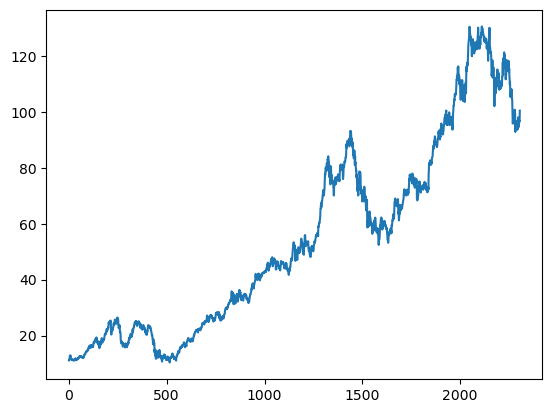

In [59]:
stock.AAPL.plot()

C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Date', ylabel='AAPL'>

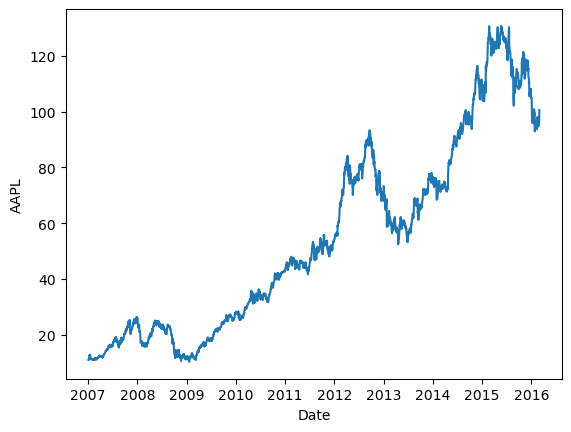

In [60]:
sns.lineplot(data=stock, x = 'Date', y = 'AAPL')

<Axes: xlabel='Date'>

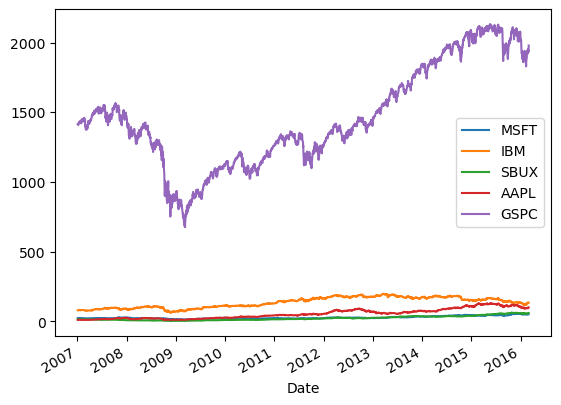

In [62]:
stock.plot()

<Axes: >

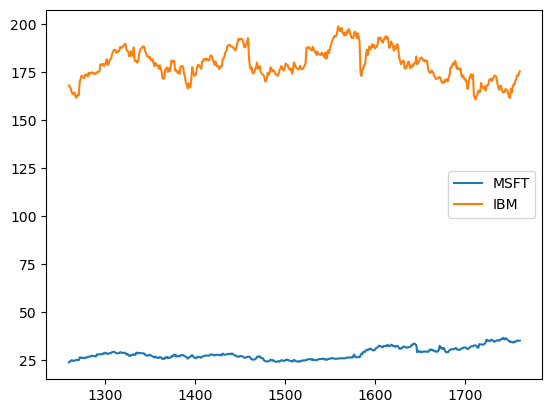

In [72]:
filtro_anni = (stock.Date.dt.year == 2012) | (stock.Date.dt.year == 2013) 
filtro_aziende = ['MSFT','IBM']
stock.loc[filtro_anni, filtro_aziende].plot()

<Axes: ylabel='Frequency'>

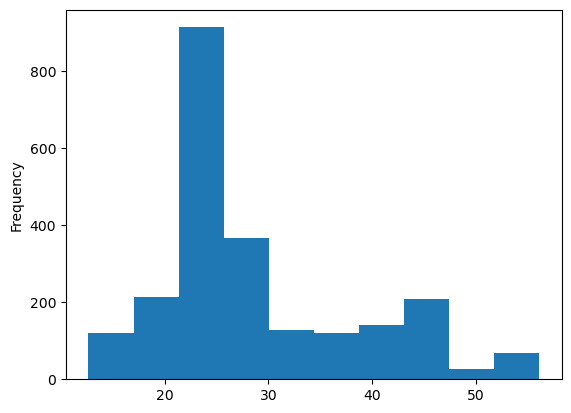

In [73]:
stock.MSFT.plot(kind='hist')

In [77]:
metal = pd.read_csv('../Dataset/beginner datasets 1/metal_bands_2017.csv', encoding = 'Latin1', index_col=0)

In [78]:
metal

,band_name,fans,formed,origin,split,style
0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...
4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"


C:\Users\Utente\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='fans', ylabel='Count'>

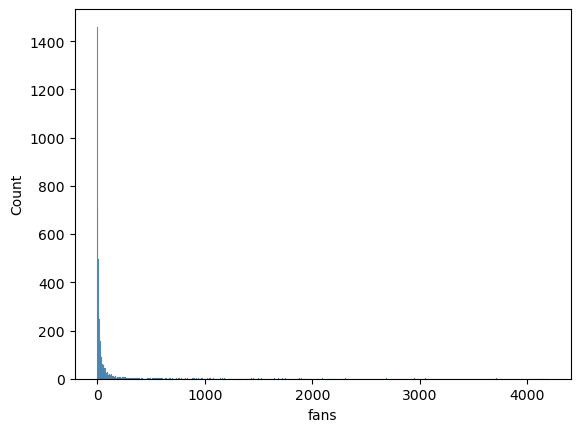

In [92]:
sns.histplot(data=metal, x ='fans')

In [ ]:
metal.groupby()